## Вариант 2

Импорты

In [167]:
import numpy as np
import matplotlib.pyplot as plt

### Практическая работа № 2. Решение трансцендентных и алгебраических уравнений методом половинного деления

Задание 1. Отделите корни заданного уравнения, пользуясь графическим методом

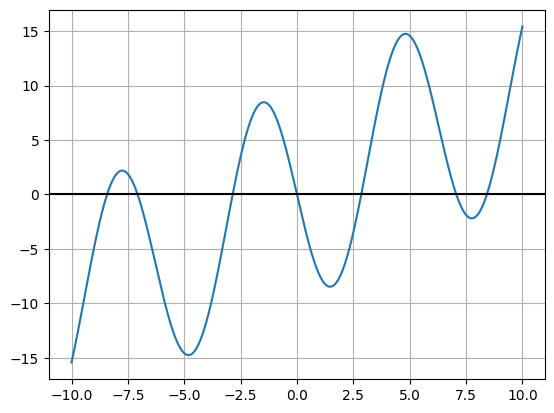

In [168]:
x = np.linspace(-10, 10, 1000)
y = x - 10 * np.sin(x)

# строим график
plt.plot(x, y)
plt.axhline(0, color='black')
plt.grid(True)
plt.show()

Здание 2

In [169]:
def f(x):
    return x - 10 * np.sin(x)

a, b = 1, 4

print(f'\nПоиск корня на [{a}, {b}] с точностью {0.001}:')
print('   a       b       c     f(c)    |b-a|')

while b - a > 0.001:
    c = (a + b) / 2
    print(f'{a:.4f}  {b:.4f}  {c:.4f}  {f(c):.4f}  {b-a:.4f}')
    
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c

print(f'\nКорень: x = {c:.4f}')
print(f'Проверка: f({c:.4f}) = {f(c):.4f}')


Поиск корня на [1, 4] с точностью 0.001:
   a       b       c     f(c)    |b-a|
1.0000  4.0000  2.5000  -3.4847  3.0000
2.5000  4.0000  3.2500  4.3320  1.5000
2.5000  3.2500  2.8750  0.2405  0.7500
2.5000  2.8750  2.6875  -1.6990  0.3750
2.6875  2.8750  2.7812  -0.7447  0.1875
2.7812  2.8750  2.8281  -0.2555  0.0938
2.8281  2.8750  2.8516  -0.0082  0.0469
2.8516  2.8750  2.8633  0.1160  0.0234
2.8516  2.8633  2.8574  0.0538  0.0117
2.8516  2.8574  2.8545  0.0228  0.0059
2.8516  2.8545  2.8530  0.0073  0.0029
2.8516  2.8530  2.8523  -0.0005  0.0015

Корень: x = 2.8523
Проверка: f(2.8523) = -0.0005


### Практическая работа № 3. Решение уравнений методом итераций

In [170]:
x = 2.5

while True:
    x_new = 10 * np.sin(x)
    if abs(x_new - x) < 0.001:
        break
    x = x_new

print(f'Корень: {x:.4f}')
print(f'Проверка: {x} - 10*sin({x}) = {x - 10 * np.sin(x):.4f}')

Корень: -2.8523
Проверка: -2.852348045958419 - 10*sin(-2.852348045958419) = -0.0001


### Практическая работа № 4 Решение уравнений методом касательных, методом хорд

Задание 1

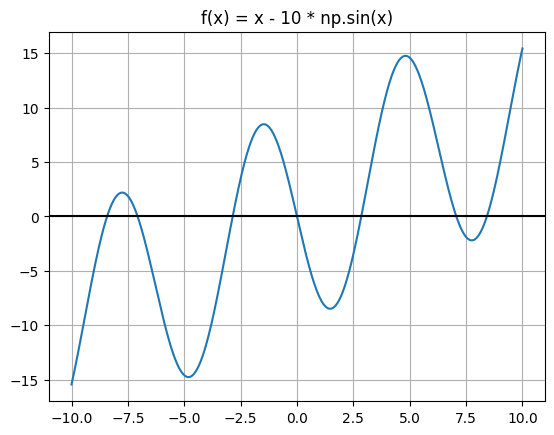

Корень на [-8.44, -8.42]
Корень на [-7.08, -7.06]
Корень на [-2.85, -2.83]
Корень на [-0.01, 0.01]
Корень на [2.83, 2.85]
Корень на [7.06, 7.08]
Корень на [8.42, 8.44]


In [171]:
x = np.linspace(-10, 10, 1000)
y = x - 10 * np.sin(x)

# строим график
plt.plot(x, y)
plt.axhline(0, color='black')
plt.grid(True)
plt.title('f(x) = x - 10 * np.sin(x)')
plt.show()

# Находим интервалы с корнями
for i in range(len(x)-1):
    if y[i] * y[i+1] < 0:
        print(f'Корень на [{x[i]:.2f}, {x[i+1]:.2f}]')

Здание 2

In [172]:
def f(x):
    return x - 10 * np.sin(x)

a, b = 2, 3  # интервал
eps = 0.001

print('n     a         b         x         f(x)      |x_n - x_{n-1}|')
print('-' * 65)

x_prev = a
n = 1
while True:
    x = a - f(a) * (b - a) / (f(b) - f(a))
    diff = abs(x - x_prev)
    
    print(f'{n:2d}   {a:.6f} {b:.6f} {x:.6f} {f(x):.6f} {diff:.6f}')
    
    if abs(f(x)) < eps or diff < eps:
        print(f'\nКорень: x = {x:.6f}')
        break
        
    if f(a) * f(x) < 0:
        b = x
    else:
        a = x
    
    x_prev = x
    n += 1

n     a         b         x         f(x)      |x_n - x_{n-1}|
-----------------------------------------------------------------
 1   2.000000 3.000000 2.816996 -0.372270 0.816996
 2   2.816996 3.000000 2.851736 -0.006417 0.034740
 3   2.851736 3.000000 2.852332 -0.000105 0.000596

Корень: x = 2.852332


Задание 3

In [173]:
def f(x):
    return x - 10 * np.sin(x)

# производная
def f_derivative(x):
    return 1 - 10 * np.cos(x)

x = 2.5  # начальное приближение
eps = 0.001

print('n     x_n        f(x_n)      |x_n - x_{n-1}|')
print('-' * 45)

n = 1
while True:
    x_new = x - f(x) / f_derivative(x)
    diff = abs(x_new - x)
    
    print(f'{n:2d}   {x:.6f}   {f(x):.6f}   {diff:.6f}')
    
    if abs(f(x_new)) < eps or diff < eps:
        print(f'\nКорень: x = {x_new:.6f}')
        break
    
    x = x_new
    n += 1

n     x_n        f(x_n)      |x_n - x_{n-1}|
---------------------------------------------
 1   2.500000   -3.484721   0.386700
 2   2.886700   0.365284   0.034213
 3   2.852487   0.001540   0.000145

Корень: x = 2.852342
